In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("simulated_health_wellness_data.csv") ## loading data

In [3]:
df.head()

,Exercise_Time_Min,Healthy_Meals_Per_Day,Sleep_Hours_Per_Night,Stress_Level,BMI
0,34.967142,5,7.618856,2,33.068556
1,28.617357,8,4.105473,7,27.267672
2,36.476885,4,6.024123,1,23.779217
3,45.230299,1,8.565319,8,29.820436
4,27.658466,3,8.301648,3,30.947352


In [4]:
df.describe() ## summary stats

,Exercise_Time_Min,Healthy_Meals_Per_Day,Sleep_Hours_Per_Night,Stress_Level,BMI
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,29.592290,2.875000,6.933582,4.995000,25.150008
std,9.310039,1.815449,1.422471,2.605556,5.070778
min,3.802549,0.000000,1.778787,1.000000,12.502971
25%,22.948723,2.000000,5.967243,3.000000,21.458196
50%,29.958081,3.000000,6.972331,5.000000,25.155662
75%,35.008525,4.000000,7.886509,7.000000,28.011155
max,57.201692,9.000000,10.708419,9.000000,37.898547


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

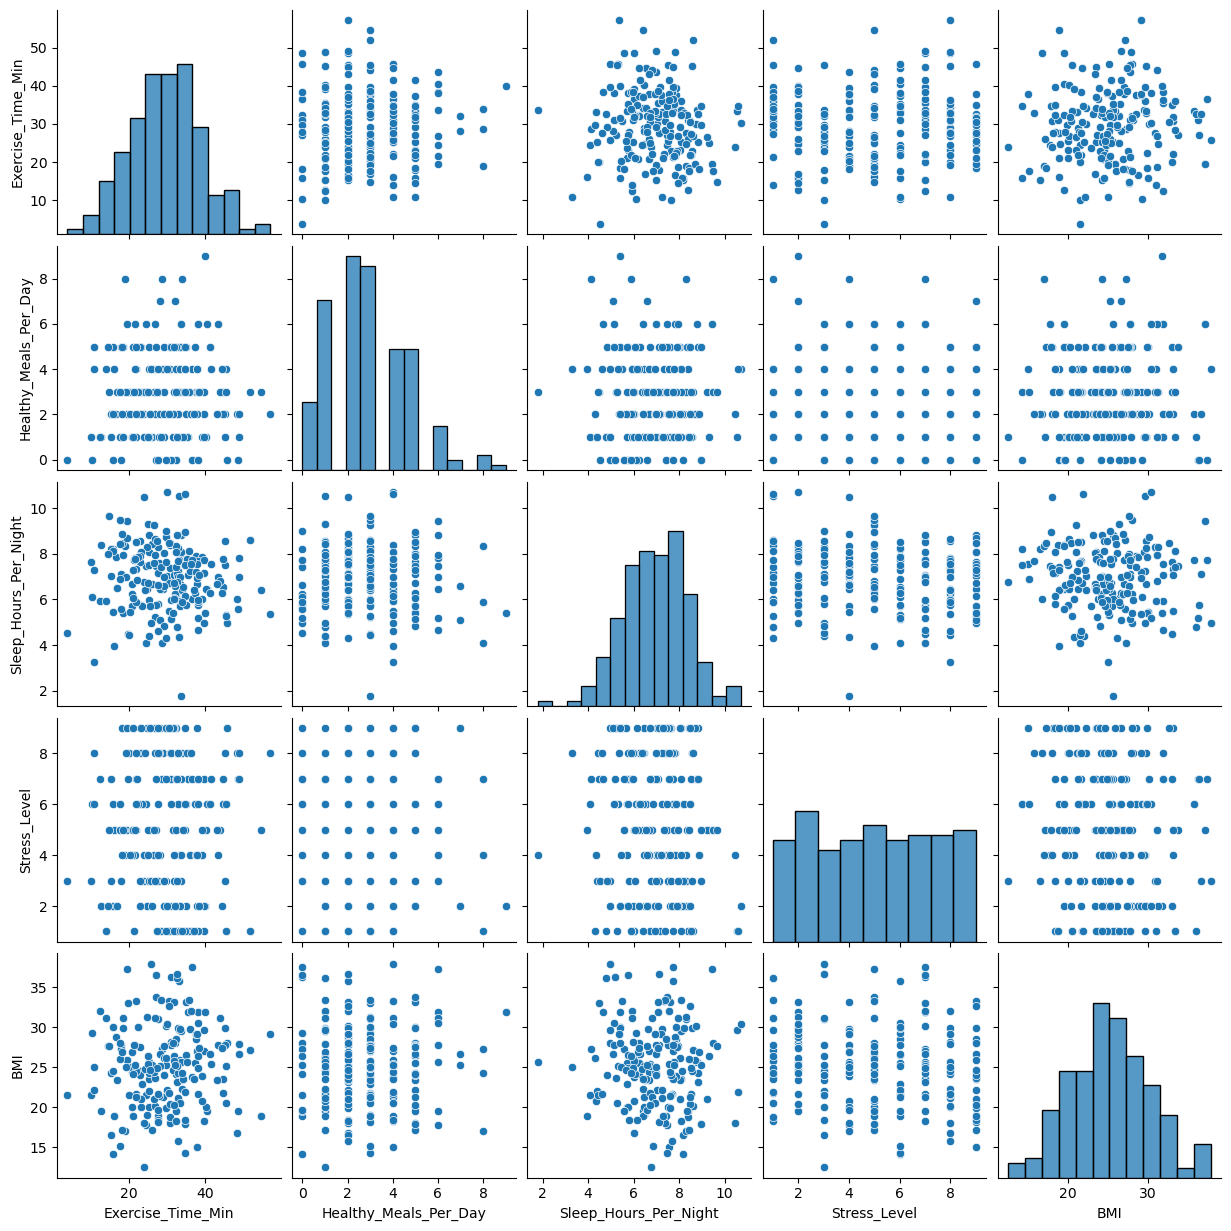

In [6]:
sns.pairplot(df) ## pairplot

In [7]:
df.corr() ## correlation matrix

,Exercise_Time_Min,Healthy_Meals_Per_Day,Sleep_Hours_Per_Night,Stress_Level,BMI
Exercise_Time_Min,1.000000,0.012108,-0.072788,0.001472,0.068954
Healthy_Meals_Per_Day,0.012108,1.000000,-0.046462,-0.080870,0.024974
Sleep_Hours_Per_Night,-0.072788,-0.046462,1.000000,-0.073312,-0.057563
Stress_Level,0.001472,-0.080870,-0.073312,1.000000,-0.131471
BMI,0.068954,0.024974,-0.057563,-0.131471,1.000000


<Axes: >

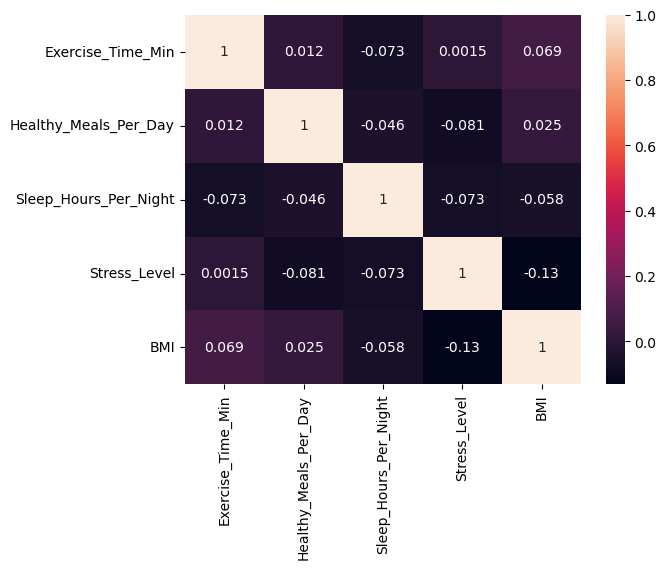

In [8]:
sns.heatmap(df.corr(), annot=True) ## heatmap

In [9]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [10]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df) ## standardise data

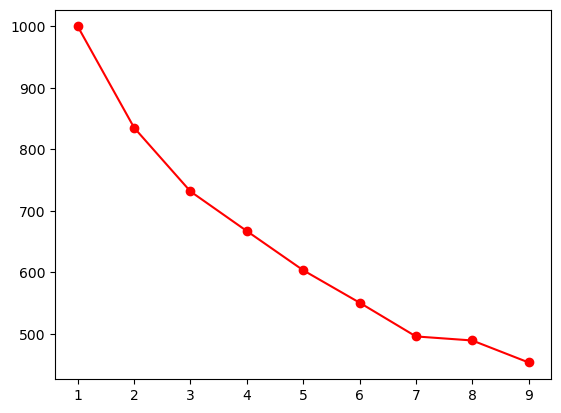

In [11]:
inertias = []

for i in range(1,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_scaled)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,10), inertias, "ro-") ## determine best n_clusters for KMeans

In [12]:
for k in range(2,11):
    kmeans = KMeans(n_clusters=k).fit(df_scaled)
    label = kmeans.labels_
    sil_coeff = silhouette_score(df_scaled, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(k, sil_coeff)) ## we will use n_clusters = 8

For n_clusters=2, The Silhouette Coefficient is 0.17153147847931513
For n_clusters=3, The Silhouette Coefficient is 0.14963891908013435
For n_clusters=4, The Silhouette Coefficient is 0.16279319142203477
For n_clusters=5, The Silhouette Coefficient is 0.16946967924333817
For n_clusters=6, The Silhouette Coefficient is 0.17581450690592135
For n_clusters=7, The Silhouette Coefficient is 0.16655315737309245
For n_clusters=8, The Silhouette Coefficient is 0.16218371490099684
For n_clusters=9, The Silhouette Coefficient is 0.15075438675146877
For n_clusters=10, The Silhouette Coefficient is 0.16693480428405447


In [13]:
kmeans = KMeans(n_clusters=8, random_state=42)
clusters = kmeans.fit_predict(df_scaled)
silhouette_score(df_scaled, clusters) ## silhouette score

0.1571940817265581

In [14]:
kmeans.inertia_ #wcss

485.6896930774895

In [ ]:
from sklearn.metrics import calinski_harabasz_score

calinski_harabasz_score(df_scaled, clusters) ## CH index

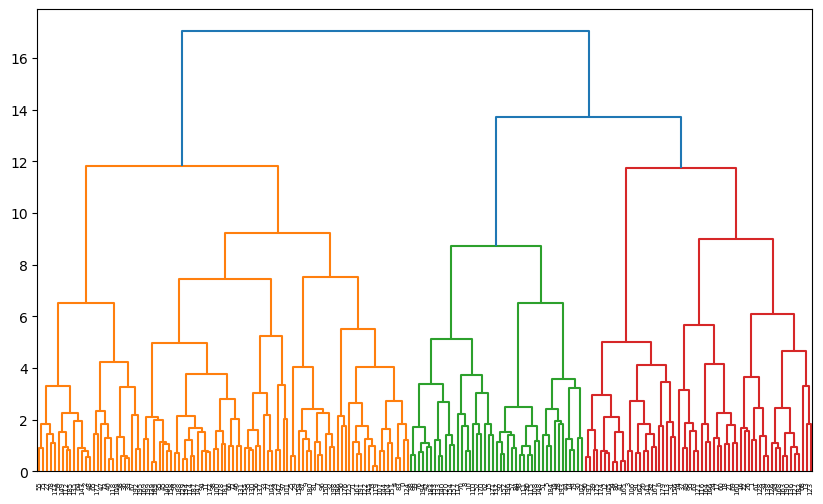

In [15]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(df_scaled, method='ward'))
plt.show() ## we will use n_clusters = 5 for hierarchical clustering

In [16]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
hc_clusters = hc.fit_predict(df_scaled)

In [17]:
silhouette_score(df_scaled, hc_clusters) ## silhouette score

0.1252209713467945

In [ ]:
calinski_harabasz_score(df_scaled, hc_clusters) ## CH index

In [18]:
# Scree plot for PCA
pca_full = PCA()
pca_full.fit(df_scaled)

PCA()

In [19]:
pca_full.explained_variance_ratio_ ## explained variance of each component

array([0.23691549, 0.22082517, 0.19828377, 0.18362786, 0.16034771])

In [20]:
np.cumsum(pca_full.explained_variance_ratio_) ## cumulative variance explained

array([0.23691549, 0.45774066, 0.65602443, 0.83965229, 1.        ])

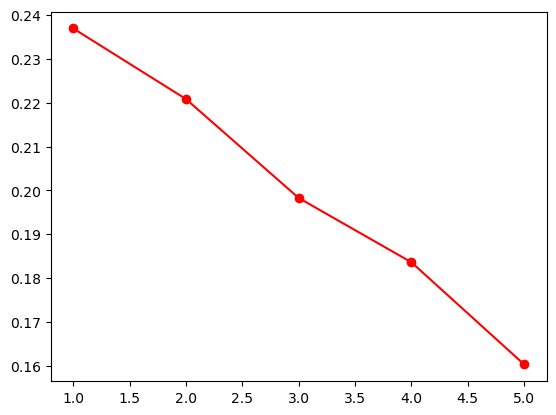

In [21]:
pca_values = np.arange(pca_full.n_components_) + 1
plt.plot(pca_values, pca_full.explained_variance_ratio_, 'ro-') ## scree plot; we will use n_components = 4

In [22]:
pca = PCA(n_components = 4)
df_pca = pca.fit_transform(df_scaled)

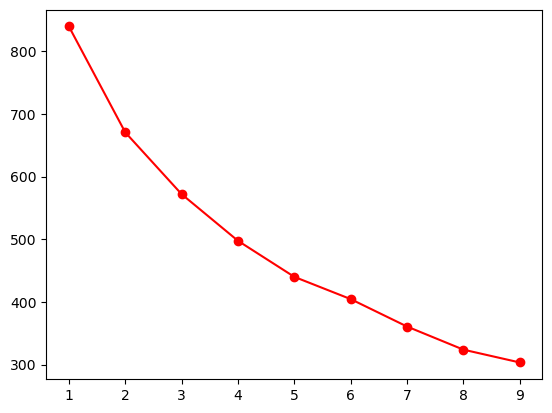

In [44]:
inertias = []

for i in range(1,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_pca)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,10), inertias, "ro-") ## determine best n_clusters for KMeans

In [24]:
for k in range(2,11):
    kmeans = KMeans(n_clusters=k).fit(df_pca)
    label = kmeans.labels_
    sil_coeff = silhouette_score(df_pca, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(k, sil_coeff)) ## we will use n_clusters = 5

For n_clusters=2, The Silhouette Coefficient is 0.19419178257387426
For n_clusters=3, The Silhouette Coefficient is 0.19135313092499515
For n_clusters=4, The Silhouette Coefficient is 0.18585623441592183
For n_clusters=5, The Silhouette Coefficient is 0.1837278234350085
For n_clusters=6, The Silhouette Coefficient is 0.20164206505642912
For n_clusters=7, The Silhouette Coefficient is 0.21507426034304114
For n_clusters=8, The Silhouette Coefficient is 0.20214924688668254
For n_clusters=9, The Silhouette Coefficient is 0.18970288261711743
For n_clusters=10, The Silhouette Coefficient is 0.18447127304332064


In [25]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(df_pca)
silhouette_score(df_pca, clusters) ## silhouette score

0.19236014448105063

In [26]:
kmeans.inertia_ #wcss

441.7379777308722

In [37]:
calinski_harabasz_score(df_pca, clusters) ## CH index

43.91364003665138

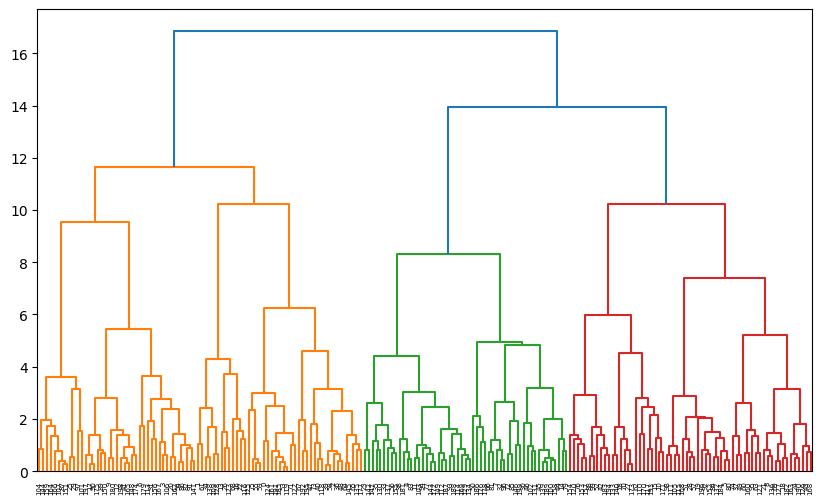

In [27]:
plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(df_pca, method='ward'))
plt.show() ## we will use n_clusters = 8 for hierarchical clustering

In [28]:
hc = AgglomerativeClustering(n_clusters=8, metric='euclidean', linkage='ward')
hc_clusters = hc.fit_predict(df_pca)

In [29]:
silhouette_score(df_pca, hc_clusters) ## silhouette score

0.18984933321746275

In [36]:
calinski_harabasz_score(df_pca, hc_clusters) ## CH index

38.79441224013278

<Axes: >

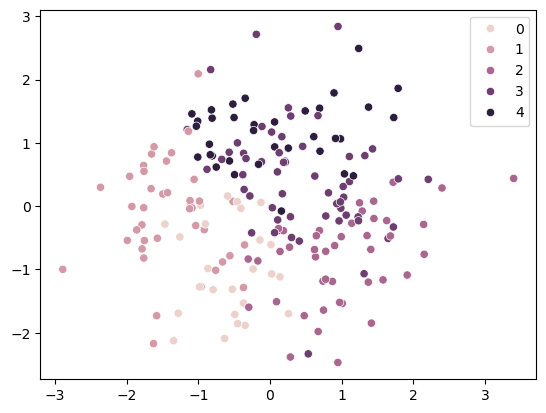

In [33]:
## the performance is better after PCA, so we will use those models

sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=clusters)

<Axes: >

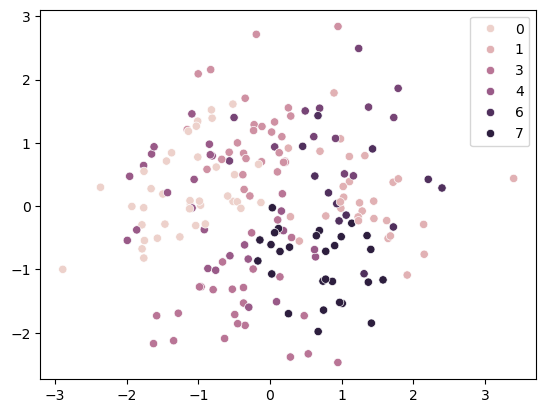

In [34]:
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=hc_clusters) ## looks like KMeans is a better clustering method here

In [39]:
df['Cluster'] = clusters.tolist()
df.head() ## seeing which individuals belong to which cluster

,Exercise_Time_Min,Healthy_Meals_Per_Day,Sleep_Hours_Per_Night,Stress_Level,BMI,Cluster
0,34.967142,5,7.618856,2,33.068556,2
1,28.617357,8,4.105473,7,27.267672,4
2,36.476885,4,6.024123,1,23.779217,2
3,45.230299,1,8.565319,8,29.820436,3
4,27.658466,3,8.301648,3,30.947352,2


In [40]:
df.agg({
    'Exercise_Time_Min': 'mean',
    'Healthy_Meals_Per_Day': 'mean',
    'Sleep_Hours_Per_Night': 'mean',
    'Stress_Level': 'mean',
    'BMI': 'mean'}).round(2)

Exercise_Time_Min        29.59
Healthy_Meals_Per_Day     2.88
Sleep_Hours_Per_Night     6.93
Stress_Level              5.00
BMI                      25.15
dtype: float64

In [41]:
df.groupby('Cluster').agg({
    'Exercise_Time_Min': 'mean',
    'Healthy_Meals_Per_Day': 'mean',
    'Sleep_Hours_Per_Night': 'mean',
    'Stress_Level': 'mean',
    'BMI': 'mean'}).round(2)

,Exercise_Time_Min,Healthy_Meals_Per_Day,Sleep_Hours_Per_Night,Stress_Level,BMI
Cluster,,,,,
0,17.68,1.60,7.44,4.20,25.70
1,27.01,2.45,7.75,6.80,19.48
2,28.04,4.60,7.28,2.53,27.11
3,38.24,1.82,6.95,4.84,27.59
4,28.88,3.86,5.18,6.77,24.85


In [42]:
df.agg({
    'Exercise_Time_Min': 'median',
    'Healthy_Meals_Per_Day': 'median',
    'Sleep_Hours_Per_Night': 'median',
    'Stress_Level': 'median',
    'BMI': 'median'}).round(2)

Exercise_Time_Min        29.96
Healthy_Meals_Per_Day     3.00
Sleep_Hours_Per_Night     6.97
Stress_Level              5.00
BMI                      25.15
dtype: float64

In [43]:
df.groupby('Cluster').agg({
    'Exercise_Time_Min': 'median',
    'Healthy_Meals_Per_Day': 'median',
    'Sleep_Hours_Per_Night': 'median',
    'Stress_Level': 'median',
    'BMI': 'median'}).round(2)

,Exercise_Time_Min,Healthy_Meals_Per_Day,Sleep_Hours_Per_Night,Stress_Level,BMI
Cluster,,,,,
0,17.69,1.0,7.83,4.0,25.96
1,26.74,2.0,7.62,7.5,19.61
2,27.66,4.0,7.32,2.0,26.41
3,37.67,2.0,6.98,5.0,27.43
4,28.84,4.0,5.30,7.0,24.72
